In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

sns.set_style('whitegrid')
sns.set_palette('Set2')
sns.color_palette('Set2')
dlsu_green = "#117a65ff"

In this notebook we will be using the london bike sharing dataset. Our goal is to use decision trees to forecast the number of bikes that will be used. 
https://www.kaggle.com/hmavrodiev/london-bike-sharing-dataset

- "timestamp" - timestamp field for grouping the data
- "cnt" - the count of a new bike shares
- "t1" - real temperature in C
- "t2" - temperature in C "feels like"
- "hum" - humidity in percentage
- "windspeed" - wind speed in km/h
- "weathercode" - category of the weather
- "isholiday" - boolean field - 1 holiday / 0 non holiday
- "isweekend" - boolean field - 1 if the day is weekend
- "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

- "weathe_code" category description:
1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 2 = scattered clouds / few clouds 3 = Broken clouds 4 = Cloudy 7 = Rain/ light Rain shower/ Light rain 10 = rain with thunderstorm 26 = snowfall 94 = Freezing Fog

In [3]:
bike_share_df = pd.read_csv("london_bike_share.csv")
bike_share_df.timestamp = pd.to_datetime(bike_share_df.timestamp)
bike_share_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
bike_share_df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
print(bike_share_df['timestamp'].min())
print(bike_share_df['timestamp'].max())

2015-01-04 00:00:00
2017-01-03 23:00:00


In [6]:
bike_share_df.timestamp

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

## Feature Engineering

In [7]:
bike_share_df['year'] = bike_share_df.timestamp.dt.year
bike_share_df["year_month"] = bike_share_df.timestamp.dt.strftime('%Y-%m')
bike_share_df["month"] = bike_share_df.timestamp.dt.month
bike_share_df["day_of_month"] = bike_share_df.timestamp.dt.day
bike_share_df["day_of_week"] = bike_share_df.timestamp.dt.dayofweek
bike_share_df["hour"] = bike_share_df.timestamp.dt.hour
bike_share_df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,year_month,month,day_of_month,day_of_week,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,2015-01,1,4,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,2015-01,1,4,6,4


## Exploratory Analysis

## Month on Month Bike Shares from 2015-2017

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

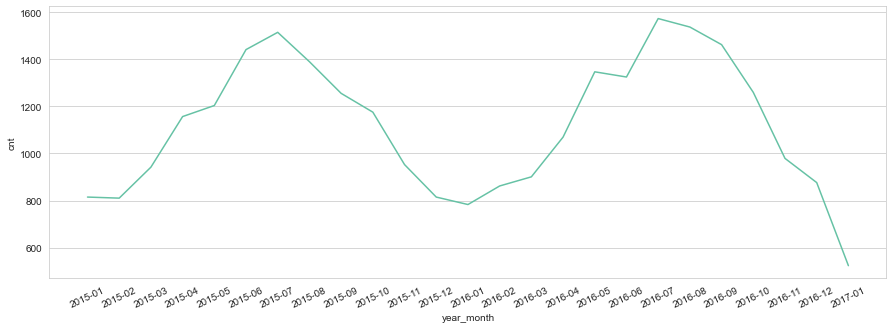

In [10]:
fig, ax = plt.subplots(figsize=(15,5), ncols=1)
sns.lineplot(x=bike_share_df['year_month'], y=bike_share_df['cnt'], ci=None)
ax.grid(False, axis='x')
plt.xticks(rotation=25)

## Bike Shares per Season

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

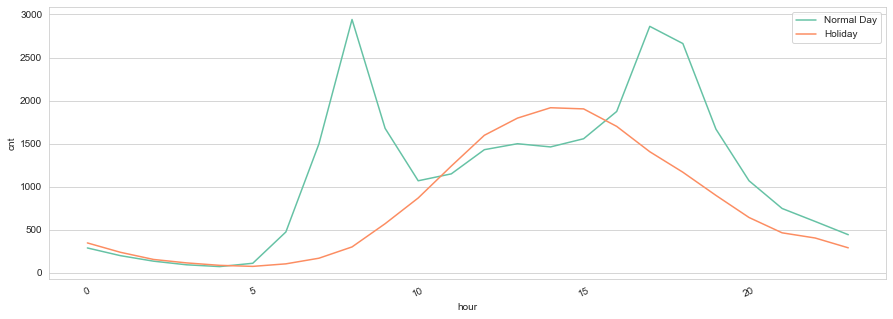

In [13]:
fig, ax = plt.subplots(figsize=(15,5), ncols=1)
sns.lineplot(x=bike_share_df['hour'], y=bike_share_df['cnt'], hue=bike_share_df['is_holiday'], ci=None)
ax.grid(False, axis='x')
ax.legend(labels=['Normal Day', 'Holiday'])
plt.xticks(rotation=25)


## Bike Shares Holiday Vs Normal Day

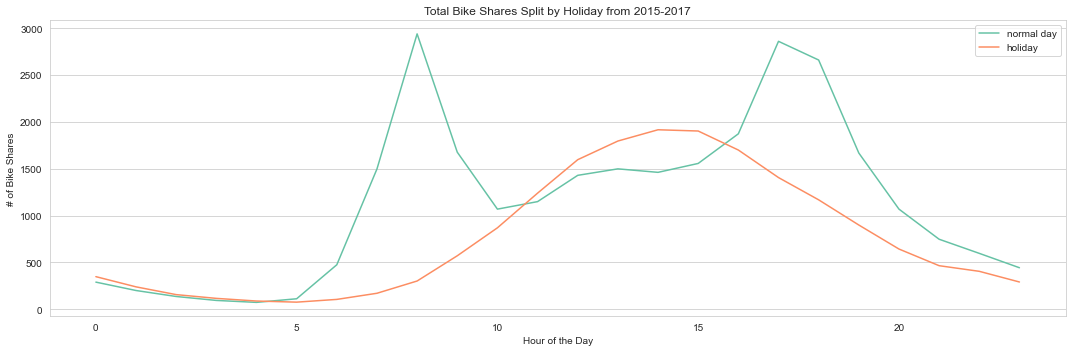

In [72]:
fig, ax = plt.subplots(figsize=(15,5), ncols=1)
sns.lineplot(x=bike_share_df['hour'], y=bike_share_df['cnt'], hue=bike_share_df['season'], ci=None)
ax.grid(False, axis='x')
ax.legend(labels=['spring', 'summer', 'fall', 'winter'])
plt.xticks(rotation=25)

## Model Development

Given that this is time series data we cant use the train test split function. This is because with train test split it jumbles our data points ignoring the temporal nature of our data. As a work around we have to manually define which dates will be used for training and which ones for testing.

In [14]:
model_data = bike_share_df.copy(deep=True)
model_data.drop(labels=['timestamp'], axis=1, inplace=True)

model_data_train = model_data[model_data.year_month < '2016-06']
model_data_test = model_data[model_data.year_month < '2016-06']


X_train = model_data_train.drop(labels=['cnt'], axis=1)
X_test = model_data_test.drop(labels=['cnt'], axis=1)
y_train = model_data_train['cnt']
y_test = model_data_test['cnt']

X_train_ts = X_train.copy(deep=True) 
X_test_ts = X_test.copy(deep=True)

X_train.drop(labels=['year_month'], axis=1, inplace=True)
X_test.drop(labels=['year_month'], axis=1, inplace=True)

print(X_train.shape)
print(X_test.shape)
X_test.head()

(12267, 13)
(12267, 13)


,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,day_of_week,hour
0,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,6,0
1,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,6,1
2,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,2
3,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,6,3
4,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,6,4


- max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
- min_samples_split: default=2. The minimum number of samples required to split an internal node. If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split.
- min_samples_leaf: default=1. The minimum number of samples required to be at a leaf node. If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each split.

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

By default if we dont control the depth and split of the decision tree the algorithm will drill down up to a point wherein the leaf nodes will be only have 1 sample. This leads to overfitting since the algorithm has memorized the rules of the training data which may not necessarily be true for real world data. Let's visualize this by using only a portion of our training data.

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train.head(50), y_train.head(50)) # doing this for visualization
print(f"R-squared {regressor.score(X_train.head(50), y_train.head(50))}")
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=500)
tree.plot_tree(regressor, feature_names=X_train.columns, filled=True);
fig.savefig("decistion_tree.png")


R-squared 1.0


Example if we use the max_depth hyperparameter this will prune our tree based on how deep we want our tree to grow. This leads to a more shallow tree and leaf nodes with more than 1 sample.

Let's use RandomizedSearchCV to help us find the optimal settings for our decision tree. Because of the temporal nature of our data we cant use the vanilla cross validation since this jumbles our data. To work through this we will use the `TimeSeriesSplit` function. This function will split our data in fixed time intervals additionally successive training sets are supersets of those that come before them.

In [213]:
from sklearn.model_selection import TimeSeriesSplit

In [222]:
tss = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)
for i in tss.split(model_data_train):
    print(i)

(array([   0,    1,    2, ..., 2044, 2045, 2046]), array([2047, 2048, 2049, ..., 4088, 4089, 4090]))
(array([   0,    1,    2, ..., 4088, 4089, 4090]), array([4091, 4092, 4093, ..., 6132, 6133, 6134]))
(array([   0,    1,    2, ..., 6132, 6133, 6134]), array([6135, 6136, 6137, ..., 8176, 8177, 8178]))
(array([   0,    1,    2, ..., 8176, 8177, 8178]), array([ 8179,  8180,  8181, ..., 10220, 10221, 10222]))
(array([    0,     1,     2, ..., 10220, 10221, 10222]), array([10223, 10224, 10225, ..., 12264, 12265, 12266]))


### Other Regression Metrics

In [226]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

2 common regression metrics being used besides $R^2$ is the Root Mean Squared Error and Mean absolute error. Both metrics can have values from 0 to $\infty$ and gives us the average model prediction error of the unit we are using for our target varaible. For example if our target variable is in inches the MAE and RMSE metrics gives us the average model prediction error in inches. 

The formula for RMSE is 
<center>$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{predicted_i -actual_i}{N}\Big)^2}}$</center>

While the formula for MAE is 
<center>$MAE = {\frac{1}{n}\Sigma_{i=1}^{n}|predicted_i - actual_i|}$</center>

The difference between the 2 is RMSE penalizes the model more for large errors due to the squaring of the residual. This makes it more sensitive to outliers compared to MAE which computes the residual only. 

Plot actual and predicted bike share count from the test data

Plot feature importance of the model

Now that you also have knowledge on other machine learning models, you are able to compare their performance 

In [230]:
from sklearn.svm import SVR
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }

svr = SVR()
svr_search = RandomizedSearchCV(svr, param_grid, cv=tss, n_iter=10)
svr_search.fit(X_train, y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                   estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [231]:
y_pred = svr_search.best_estimator_.predict(X_test)

print(f"RMSE = {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"MAE = {mean_absolute_error(y_test, y_pred)}")

RMSE = 668.7295814545247
MAE = 309.76375116056283


In [232]:
svr_y_pred = svr_search.best_estimator_.predict(X_test)
dtree_y_pred = reg.best_estimator_.predict(X_test)

res_df = pd.DataFrame()
res_df['algo'] = ['SVM', 'Decision Tree']
res_df['R2'] = [svr_search.best_estimator_.score(X_test, y_test),
                reg.best_estimator_.score(X_test, y_test)]
res_df['RMSE'] = [mean_squared_error(y_test, svr_y_pred, squared=False),
                  mean_squared_error(y_test, dtree_y_pred, squared=False)]
res_df['MAE'] = [mean_absolute_error(y_test, svr_y_pred),
                  mean_absolute_error(y_test, dtree_y_pred)]
res_df

,algo,R2,RMSE,MAE
0,SVM,0.588422,668.729581,309.763751
1,Decision Tree,0.534630,711.087956,480.703212


In [208]:
res_melted = pd.melt(res_df[['algo', 'RMSE', 'MAE']], id_vars=['algo'], value_vars=['RMSE', 'MAE'])
res_melted

,algo,variable,value
0,SVM,RMSE,808.793648
1,Decision Tree,RMSE,711.087956
2,SVM,MAE,441.980904
3,Decision Tree,MAE,480.703212


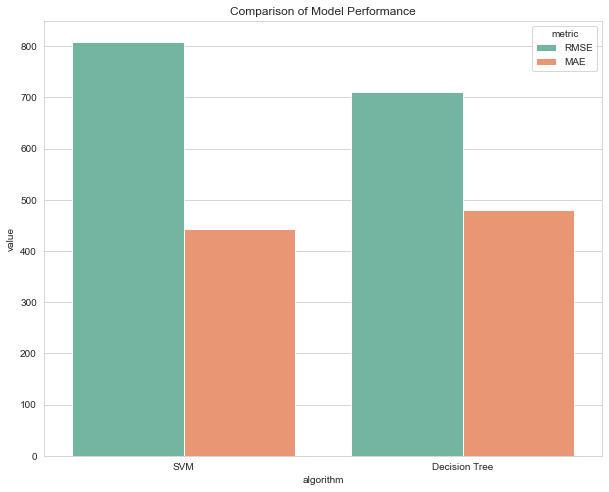

In [211]:
fig, ax = plt.subplots(figsize=(10,8), ncols=1)
sns.barplot(x="algo", y="value", hue="variable", data=res_melted)
ax.set_title('Comparison of Model Performance')
ax.set_xlabel('algorithm')
ax.legend(title='metric')